In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   beta         1000 non-null   float64
 1   exponential  1000 non-null   float64
 2   normal_p     1000 non-null   float64
 3   normal_l     1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [5]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,39.916108,36.147733,8.615521,8.654942,22.758781
1,52.731202,4.956215,9.261520,18.856964,18.387779
2,44.910284,10.054227,10.950567,10.751232,23.334328
3,45.699394,6.220235,7.985085,8.789921,21.656264
4,45.858301,2.974296,10.004318,10.002899,23.023992


<AxesSubplot:ylabel='Density'>

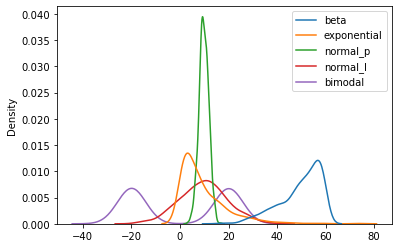

In [6]:
sns.kdeplot(data=df)

In [7]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.705017,9.538588,9.830202,9.735419,0.022937
std,8.571084,9.845265,1.992856,9.817215,20.230777
min,15.737496,0.010745,3.186248,-19.327892,-29.195743
25%,44.983636,2.532784,8.548238,3.357013,-19.942471
50%,51.934962,6.450525,9.818772,9.872944,-0.803092
75%,56.652840,13.596225,11.201378,16.169303,20.182882
max,59.995937,73.542624,16.664721,39.726598,28.979413


<AxesSubplot:ylabel='Density'>

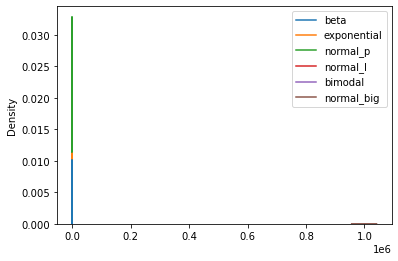

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

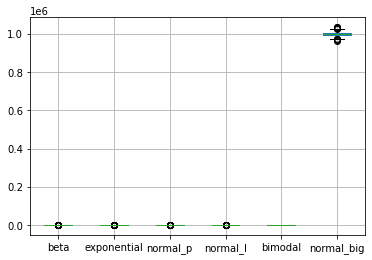

In [9]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.029963,2.684265,-0.453520,-0.095065,0.587207,0.233899
1,0.068234,-0.135067,-0.210035,0.701203,0.478273,1.254824
2,-0.601984,0.325731,0.426587,0.068550,0.601550,-0.559024
3,-0.534361,-0.020815,-0.691139,-0.084530,0.559730,-1.816612
4,-0.520743,-0.314209,0.069934,0.010143,0.593816,0.427915


<AxesSubplot:ylabel='Density'>

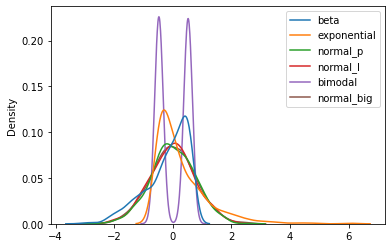

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,-0.191097,2.791232e-01,4.308100e-03,-0.010734,0.020586,0.003028
std,0.734505,8.898917e-01,7.511313e-01,0.766234,0.504189,0.780684
min,-3.101965,-5.820774e-01,-2.499878e+00,-2.279127,-0.707599,-2.701056
25%,-0.595698,-3.541159e-01,-4.788794e-01,-0.508569,-0.476990,-0.503408
50%,0.000000,4.011548e-17,-3.347474e-16,0.000000,0.000000,0.000000
75%,0.404302,6.458841e-01,5.211206e-01,0.491431,0.523010,0.496592
max,0.690790,6.064306e+00,2.580320e+00,2.330079,0.742237,2.576224


<AxesSubplot:>

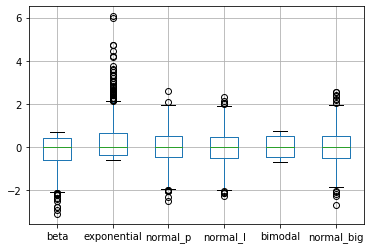

In [15]:
df_s.boxplot()

In [17]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.1019651803694264,
 -0.5820774317391745,
 -2.499877562756023,
 -2.2791269038346527,
 -0.7075988076720144,
 -2.701056162011942]

In [18]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6907904892949395,
 6.0643062270829375,
 2.580319727328207,
 2.330079382099667,
 0.7422365907127335,
 2.576223790468336]

In [19]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.19349616e+01,  6.45052476e+00,  9.81877239e+00,  9.87294419e+00,
       -8.03091704e-01,  9.99514048e+05])